### LASSO Regression

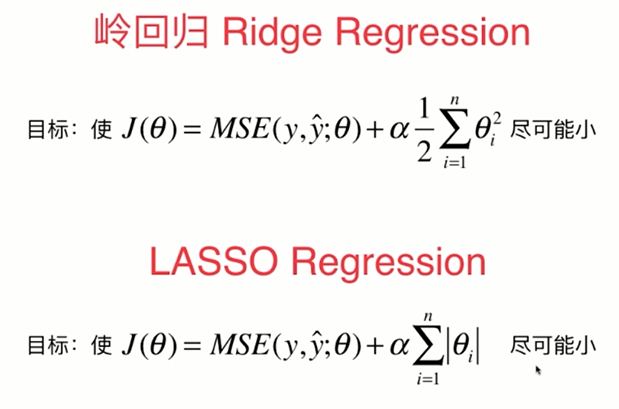

对比而言，只是对theta的处理原理不同而已

Least Absolute Shrinkage and Selection Operator Regression

### LASSO

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x +3 + np.random.normal(0, 1, size=100)

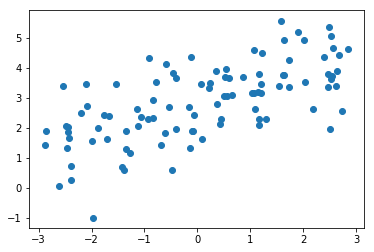

In [3]:
plt.scatter(x, y)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [6]:
def PolynomialRegression(degree):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [7]:
from sklearn.metrics import mean_squared_error


poly20_reg = PolynomialRegression(degree=20)
poly20_reg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

当degree=20的时候，进行预测

In [8]:
y20_predict = poly20_reg.predict(X_test)
mean_squared_error(y_test, y20_predict)

82.54484851741896

In [9]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)
    
    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])


对上面的模型进行绘制

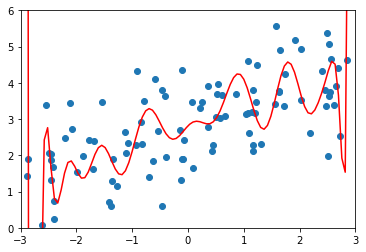

In [10]:
plot_model(poly20_reg)

可以看出，不添加正规化，线段非常的陡峭，非常的不规则化

即它的泛化能力非常的差，即在x_test上预测的结果非常的不好

In [11]:
from sklearn.linear_model import Lasso

所以就行=像上面那个一样，包装一个管道

In [12]:
def LassoRegression(degree, alpha):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lasso_reg", Lasso(alpha=alpha))
    ]) 

构建一个lasso的方法，来简单实现

In [13]:
lasso1_reg = LassoRegression(20, 0.01)

这里的第二个超参数，之所以很大是因为，后面的thetad是绝对值，本身就很小，相对于领回归的平法是有差异的

In [14]:
lasso1_reg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso_reg', Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [15]:
y1_predict = lasso1_reg.predict(X_test)
mean_squared_error(y1_predict,y_test)

0.8741631874948151

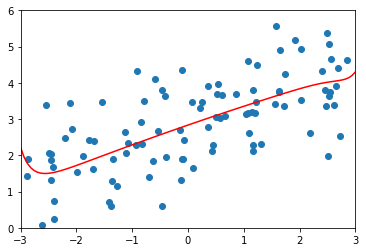

In [16]:
plot_model(lasso1_reg)

相比之下，下面的这种lasso方法的均方误差又变小了

In [17]:
lasso2_reg = LassoRegression(20, 0.1)
lasso2_reg.fit(X_train, y_train)
y2_predict = lasso2_reg.predict(X_test)
mean_squared_error(y2_predict,y_test)

0.8651556450565769

相应的，结果又好了一些

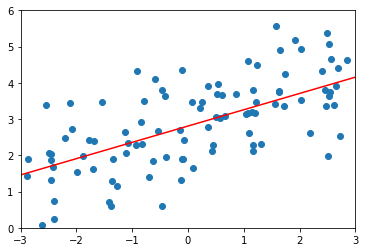

In [18]:
plot_model(lasso2_reg)

继续对参数进行调整

In [19]:
lasso3_reg = LassoRegression(20, 1)
lasso3_reg.fit(X_train, y_train)
y3_predict = lasso3_reg.predict(X_test)
mean_squared_error(y3_predict,y_test)

1.4547047812270748

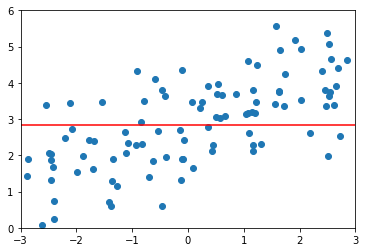

In [20]:
plot_model(lasso3_reg)

此时得到的就是一条直线了

可以在没有正则化和正则化成直线的之间选一条直线

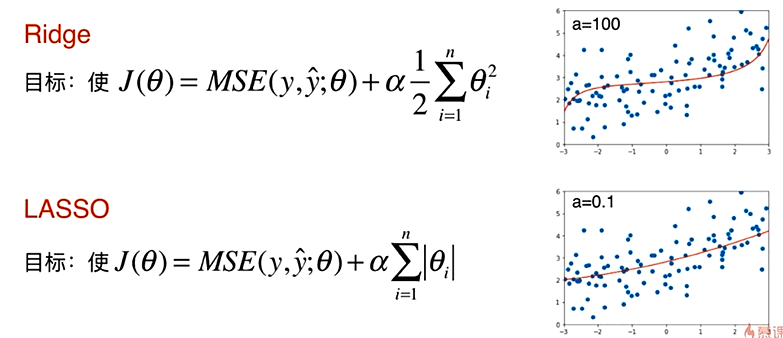

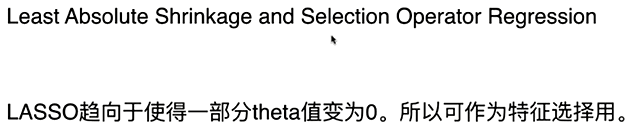

### 先看Ridge regression

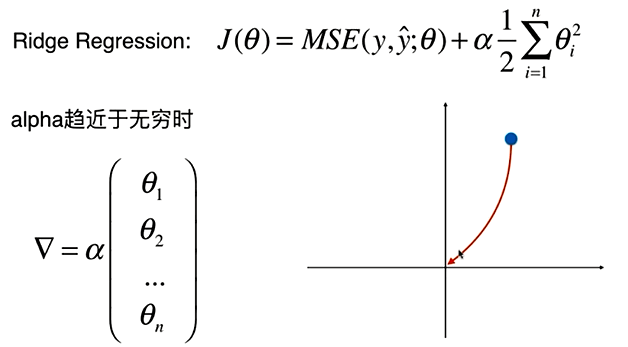

### 再看LASSO回归

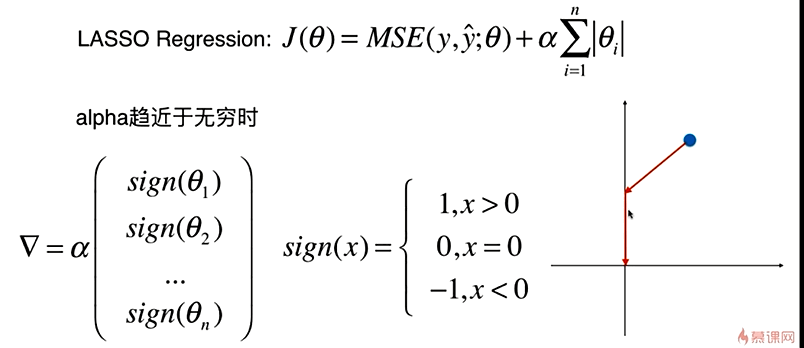

相对来说，还是ridge regression更为准确一些，领回归会将一部分有用的值忽略

但是特征值特别大的时候，此时使用lasso就是很好的策略了